In [3]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

raw_data = json.load(open('./data/championFull.json'))['data']

data = []
columns = ['id', 'primary', 'secondary']

for index, (key, champion) in enumerate(raw_data.items()):
    champion_data = [champion['id']]
    
    for name in champion['tags']:
        champion_data.append(name)
        
    if len(champion['tags']) < 2:
        champion_data.append('')
        
    for name, stat in champion['stats'].items():
        # Get all the column names on the first champion only.
        if index == 1:
            columns.append(name)

        champion_data.append(stat)
        
    data.append(champion_data)
    
df = pd.DataFrame(data, columns=columns)
# Rename to the more modern name for magic resist.
df.rename(columns={'spellblock': 'mr', 'spellblockperlevel': 'mrperlevel'}, inplace=True)
# For now these are always 0
df = df.drop(columns=['crit', 'critperlevel'])

columns = df.columns.values.tolist()

In [4]:
df.describe()

,hp,hpperlevel,mp,mpperlevel,movespeed,armor,armorperlevel,mr,mrperlevel,attackrange,hpregen,hpregenperlevel,mpregen,mpregenperlevel,attackdamage,attackdamageperlevel,attackspeedperlevel,attackspeed
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.00000,145.000000,145.000000,145.000000,145.000000,145.000000,145.00000,145.000000
mean,556.141793,88.567241,308.814483,32.868966,336.400000,30.073159,3.467586,31.154483,0.896897,320.551724,6.62931,0.666552,8.412986,0.558103,59.402231,3.257494,2.45329,0.646786
std,37.482164,6.600403,115.804259,16.707244,7.575912,6.826577,0.478588,1.582850,0.378558,195.920297,1.73858,0.161488,8.383170,0.281426,6.187004,0.588240,0.82232,0.034982
min,340.000000,65.000000,0.000000,0.000000,315.000000,17.040000,0.000000,25.000000,0.300000,125.000000,2.50000,0.400000,0.000000,0.000000,40.368000,1.500000,0.00000,0.475000
25%,534.000000,85.000000,277.200000,25.000000,330.000000,24.300000,3.250000,30.000000,0.500000,125.000000,5.50000,0.550000,6.972000,0.450000,55.000000,3.000000,2.00000,0.625000
50%,564.480000,89.000000,324.000000,38.000000,335.000000,30.000000,3.500000,32.000000,1.250000,175.000000,7.00000,0.600000,7.590000,0.650000,60.000000,3.200000,2.50000,0.638000
75%,582.240000,92.000000,375.000000,43.000000,340.000000,35.000000,3.750000,32.100000,1.250000,525.000000,8.00000,0.750000,8.010000,0.800000,64.000000,3.500000,3.00000,0.658000
max,625.640000,112.000000,500.000000,67.000000,355.000000,47.000000,5.000000,39.000000,1.500000,650.000000,10.00000,1.750000,50.000000,1.000000,70.000000,5.000000,6.00000,0.800000


In [5]:
df['primary'].value_counts()

Fighter     40
Mage        33
Marksman    22
Tank        19
Assassin    16
Support     15
Name: primary, dtype: int64

In [6]:
df['secondary'].value_counts()

            35
Mage        25
Fighter     23
Tank        23
Assassin    20
Support     16
Marksman     3
Name: secondary, dtype: int64

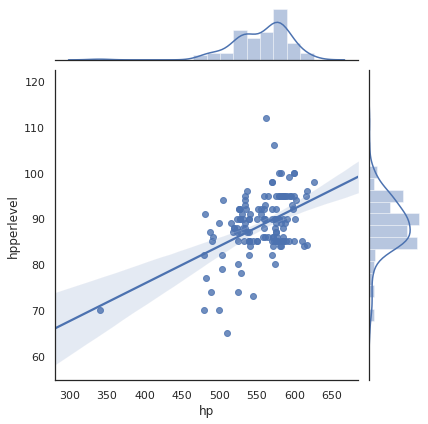

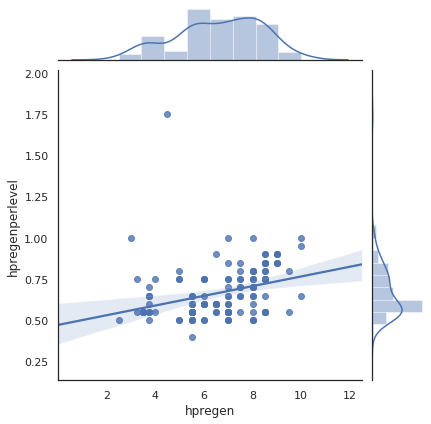

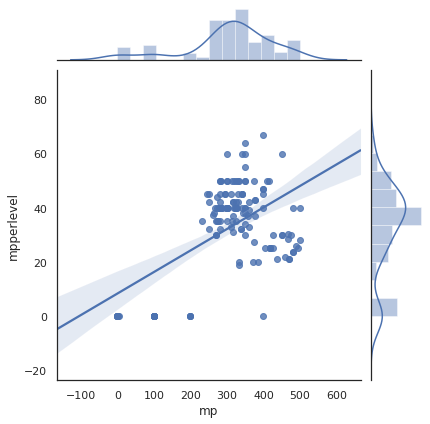

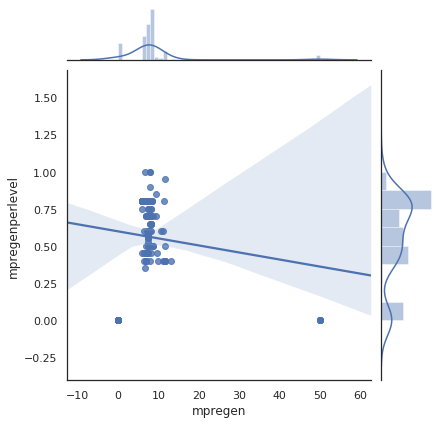

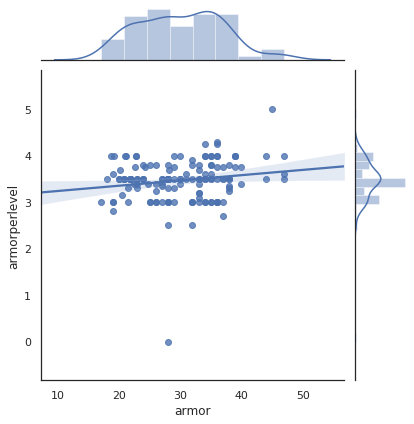

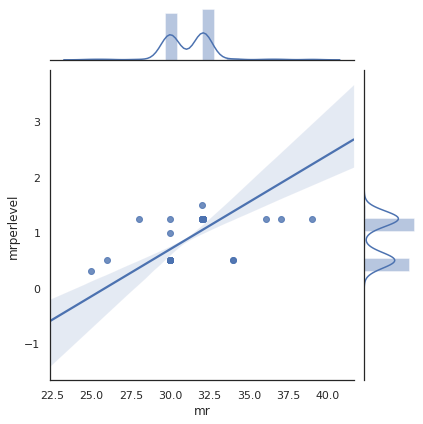

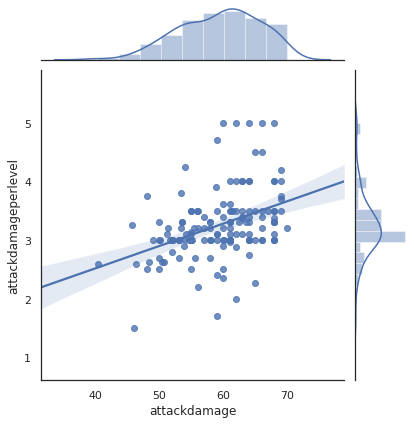

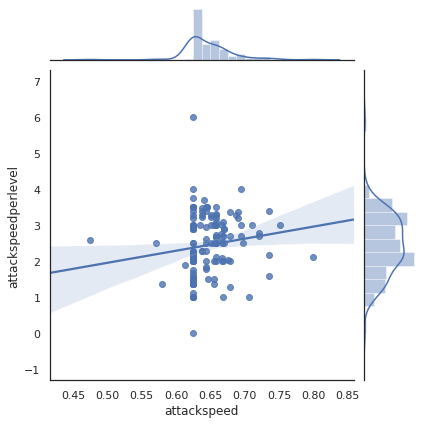

In [7]:
pairs = [('hp', 'hpperlevel'), ('hpregen', 'hpregenperlevel'), ('mp', 'mpperlevel'), 
         ('mpregen','mpregenperlevel'), ('armor', 'armorperlevel'), ('mr', 'mrperlevel'),
        ('attackdamage', 'attackdamageperlevel'), ('attackspeed', 'attackspeedperlevel')]

for pair in pairs:
    sns.jointplot(pair[0], pair[1], data=df, kind="reg")

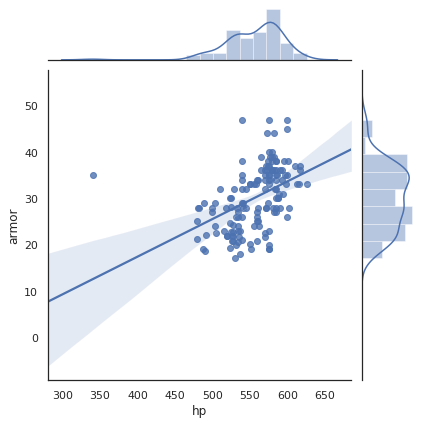

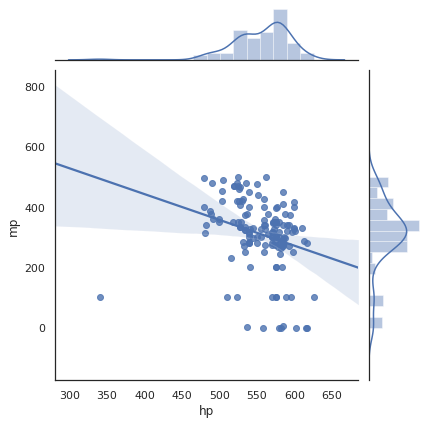

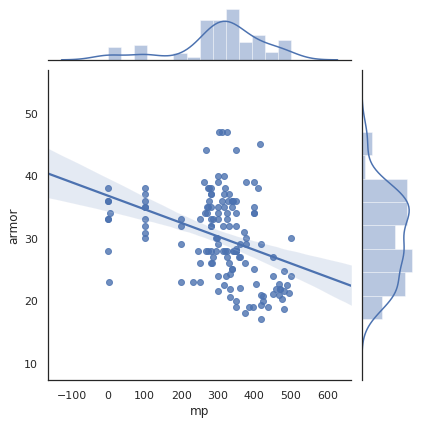

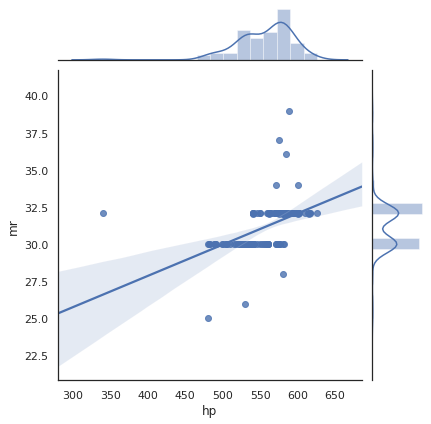

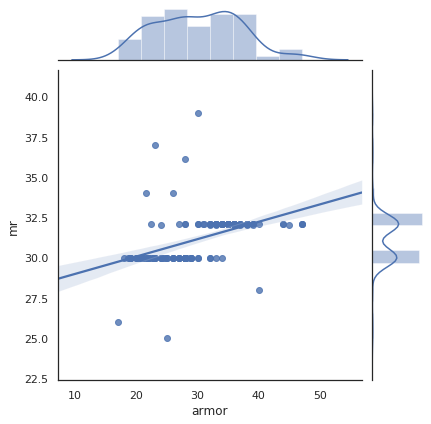

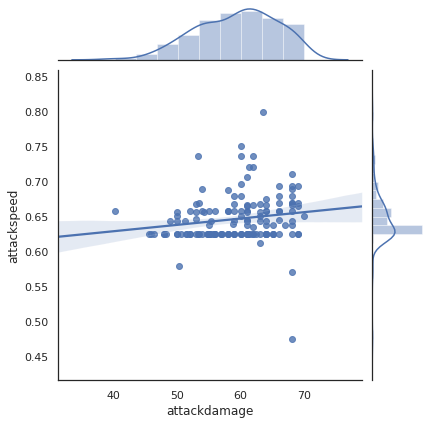

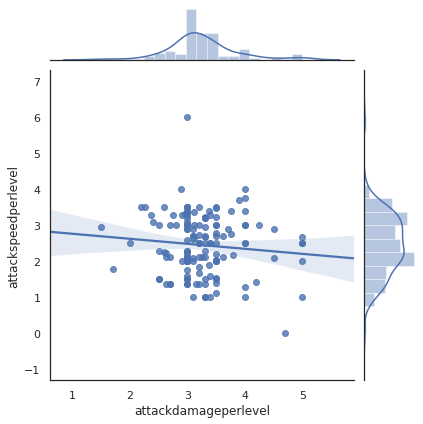

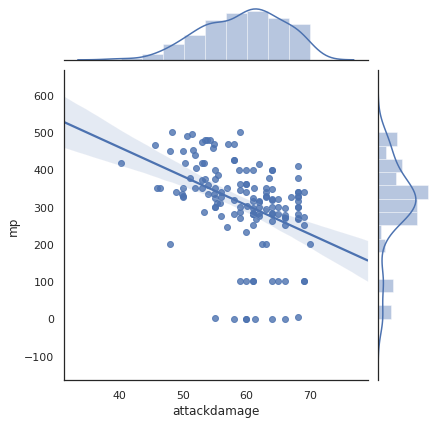

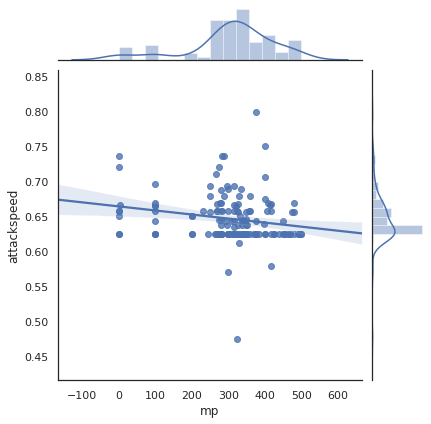

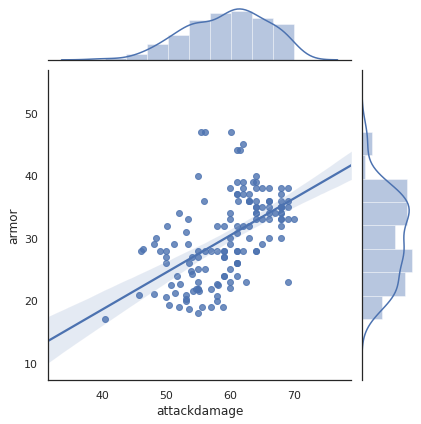

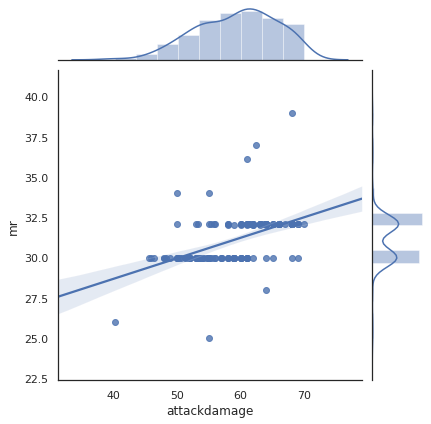

In [8]:
pairs = [('hp', 'armor'), ('hp', 'mp'), ('mp', 'armor'), ('hp', 'mr'), ('armor', 'mr'),
         ('attackdamage','attackspeed'), ('attackdamageperlevel', 'attackspeedperlevel'),
         ('attackdamage', 'mp'), ('mp', 'attackspeed'), ('attackdamage', 'armor'), ('attackdamage', 'mr')]

for pair in pairs:
    sns.jointplot(pair[0], pair[1], data=df, kind="reg")

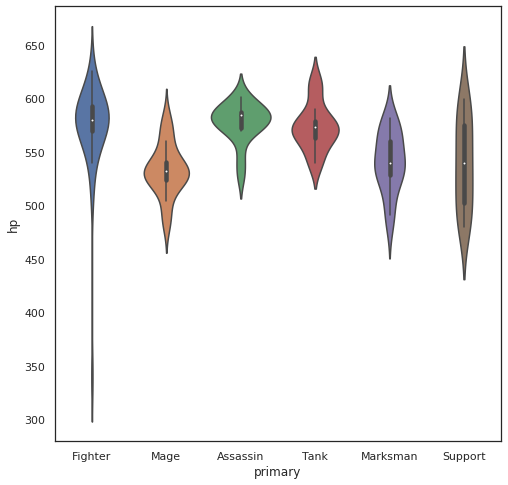

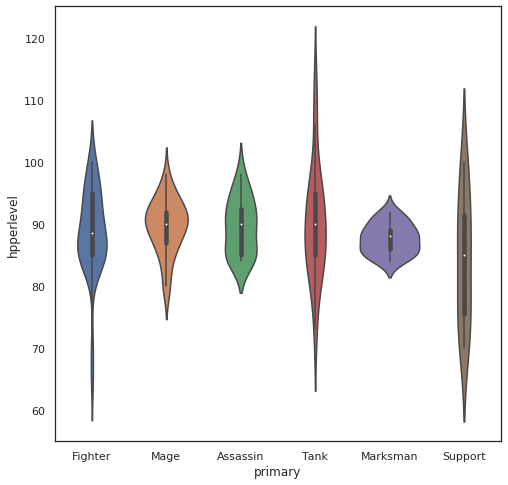

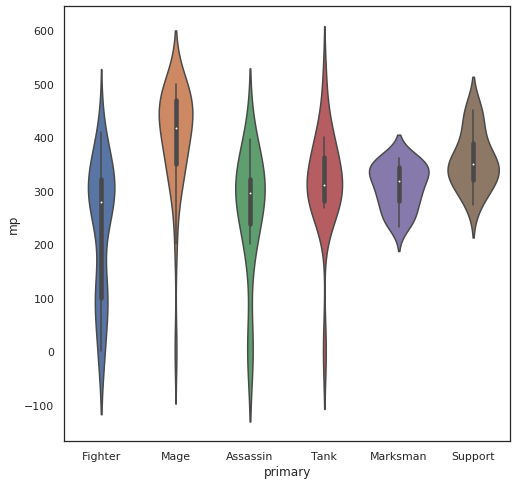

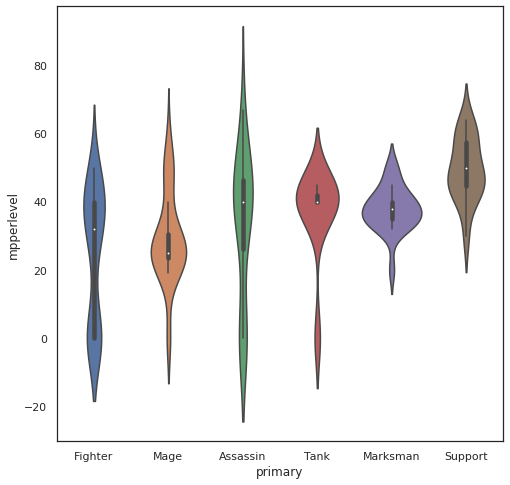

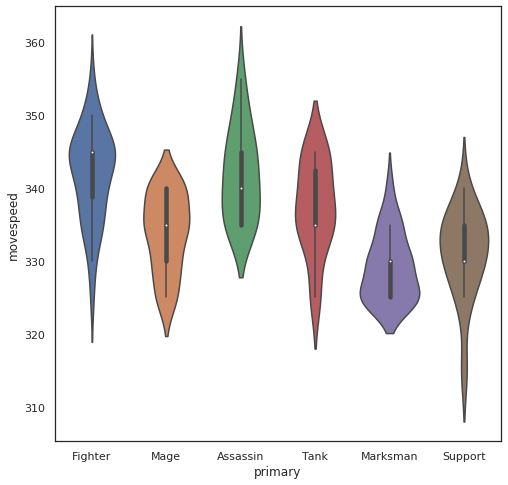

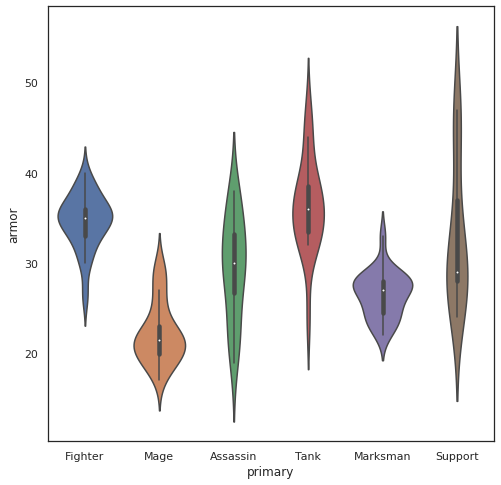

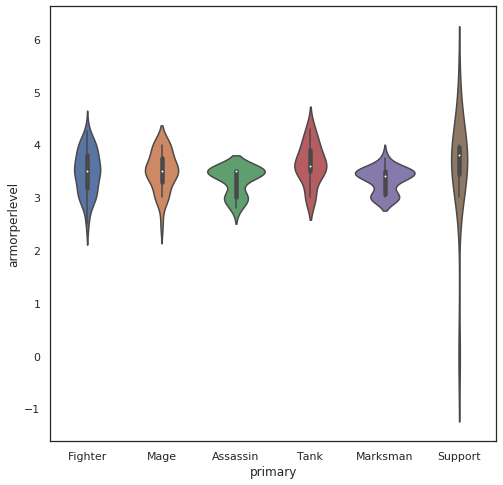

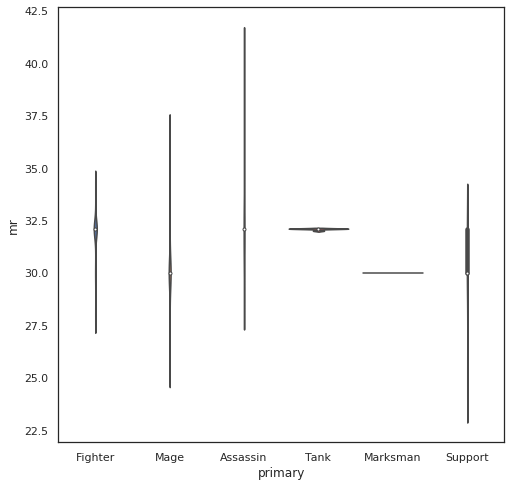

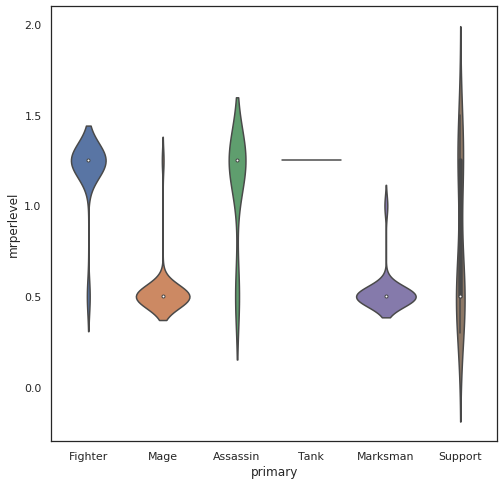

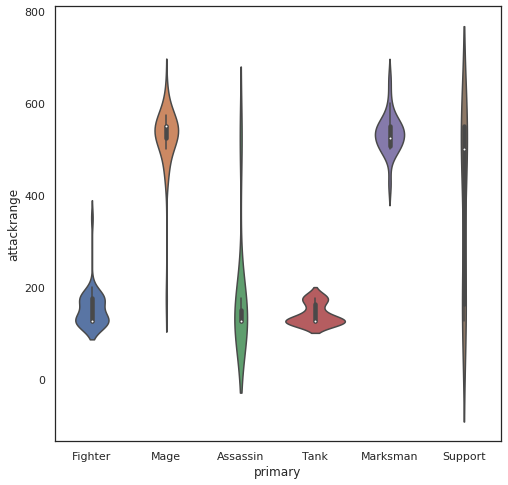

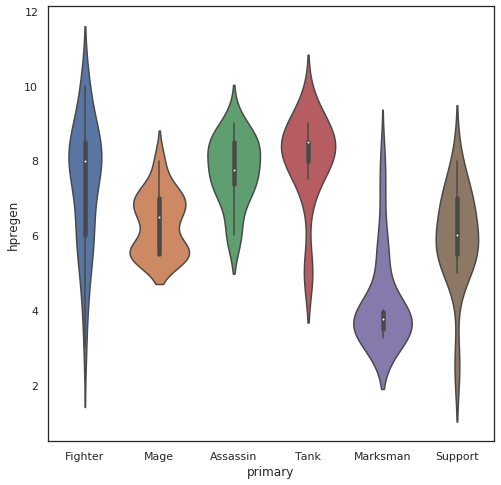

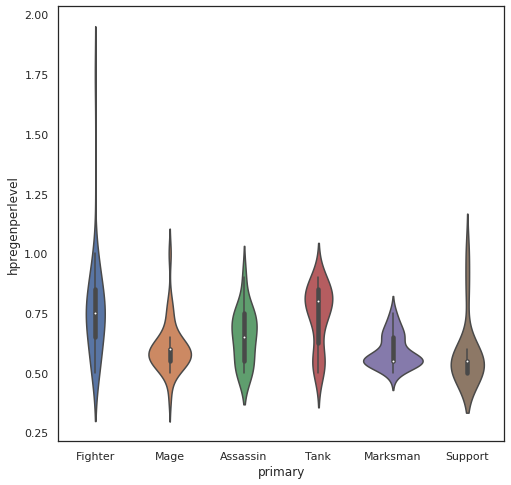

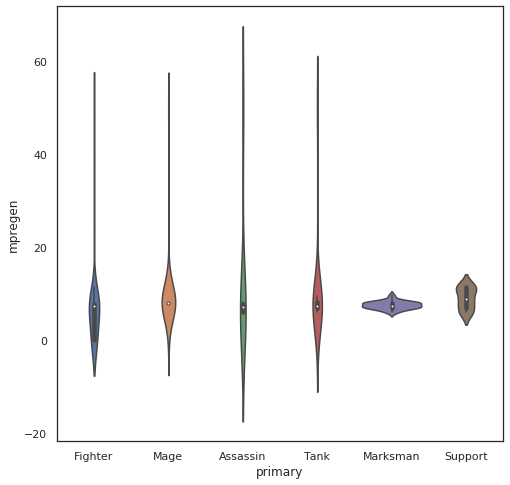

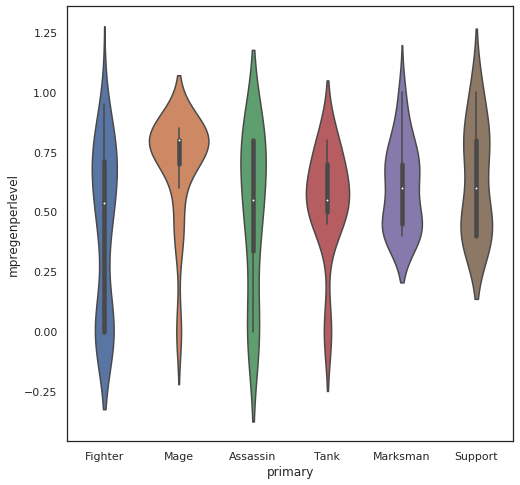

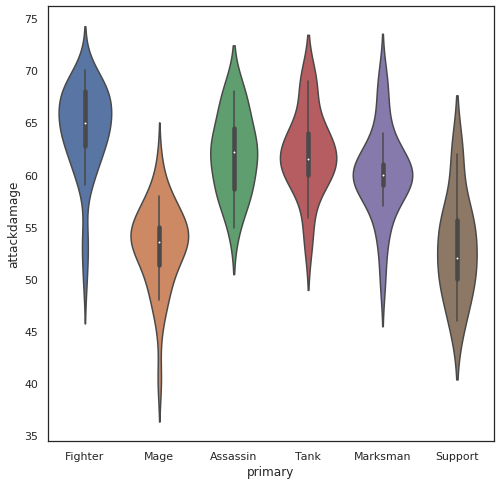

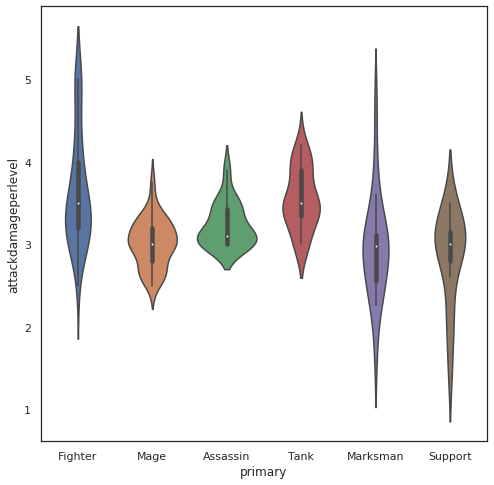

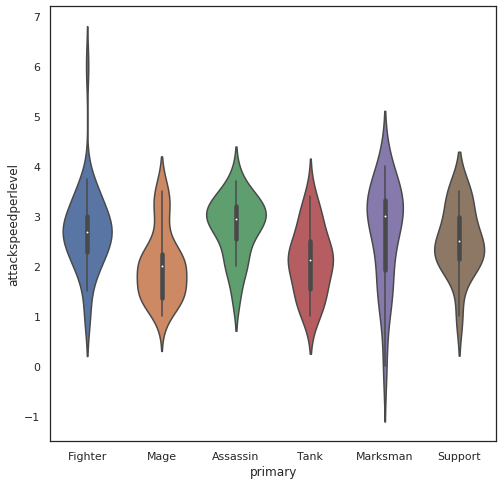

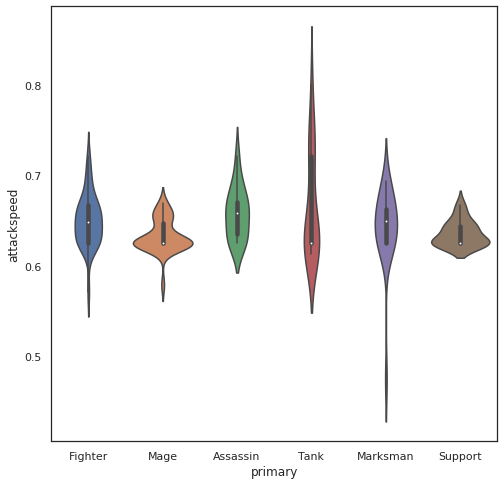

In [9]:
for column in columns[3:]:
    plt.figure(figsize=(8, 8))
    sns.violinplot(x='primary', y=column, data=df)

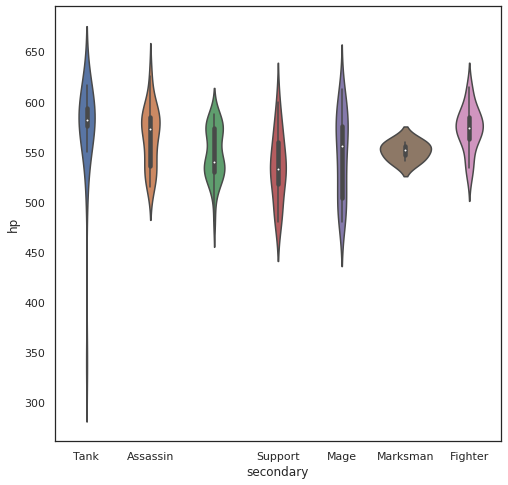

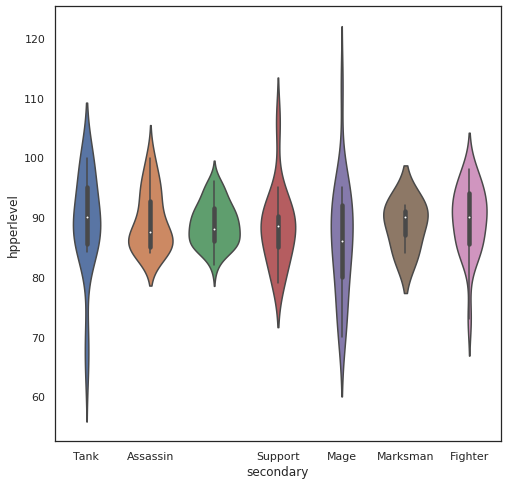

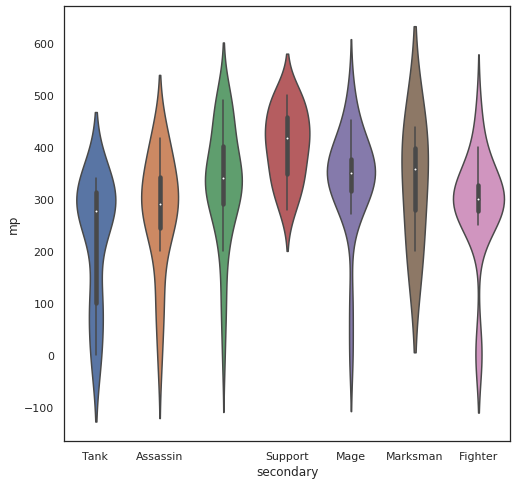

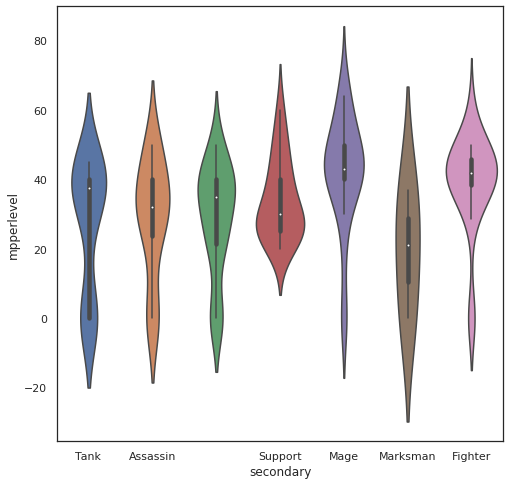

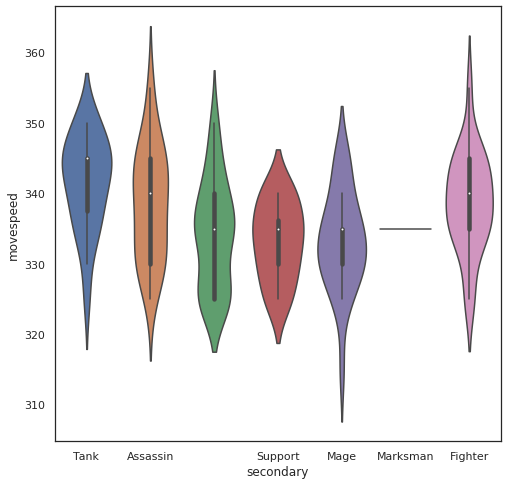

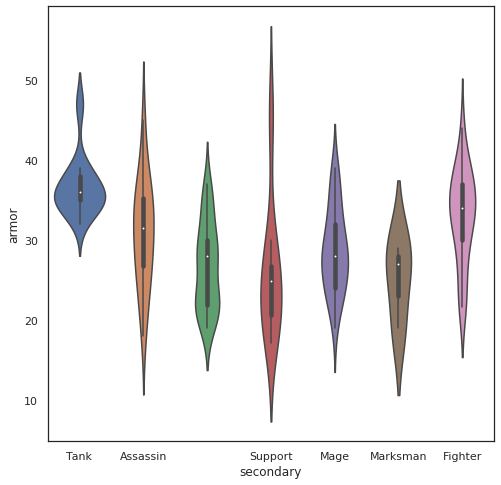

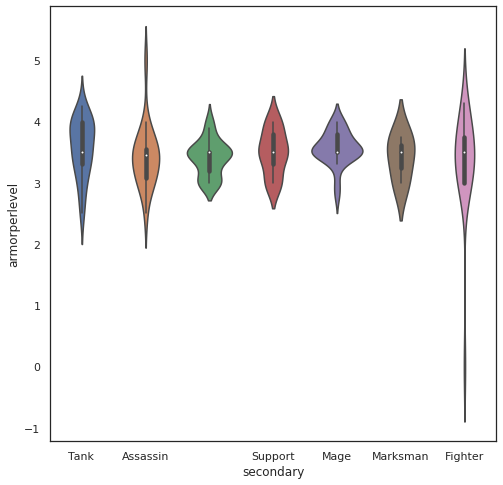

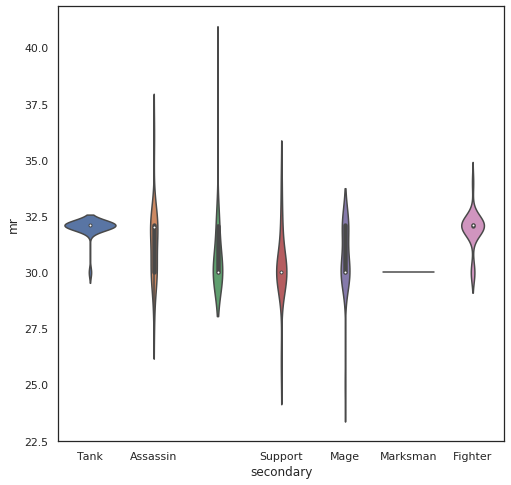

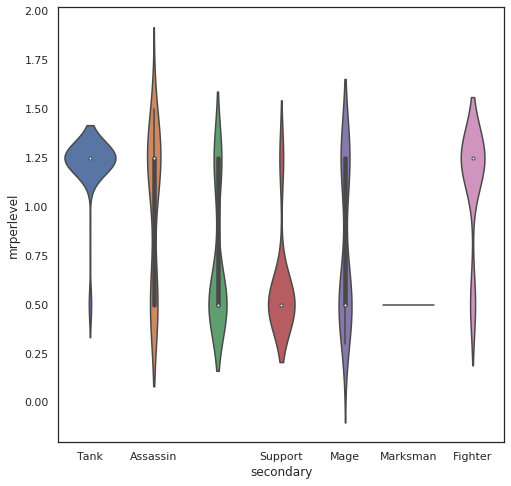

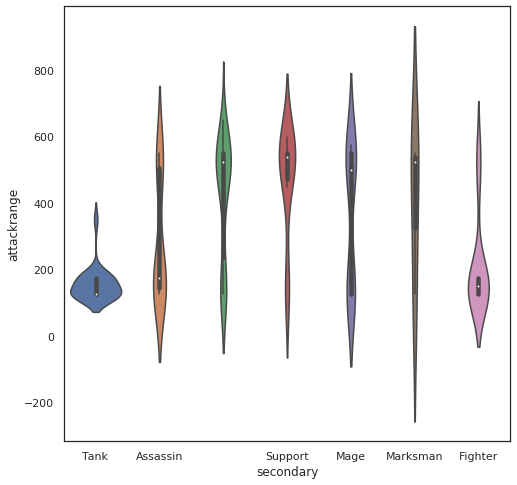

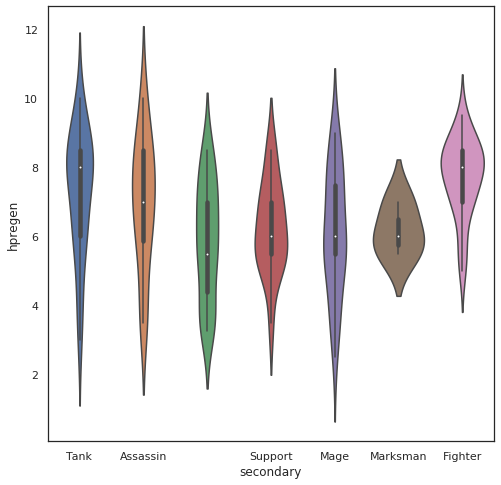

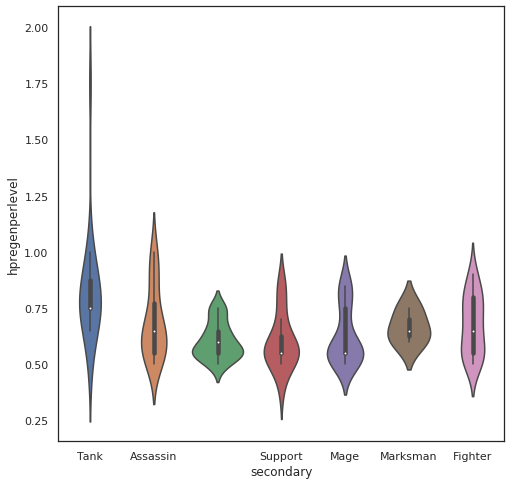

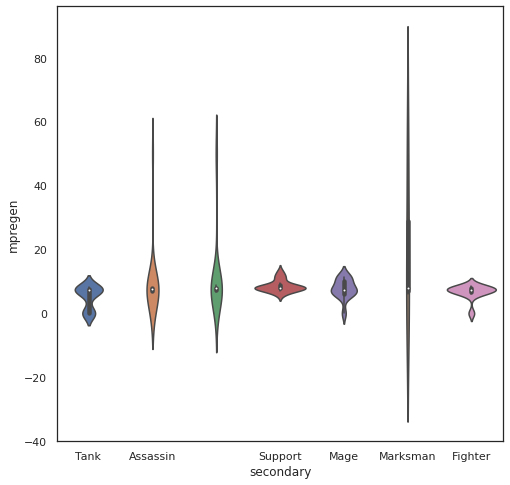

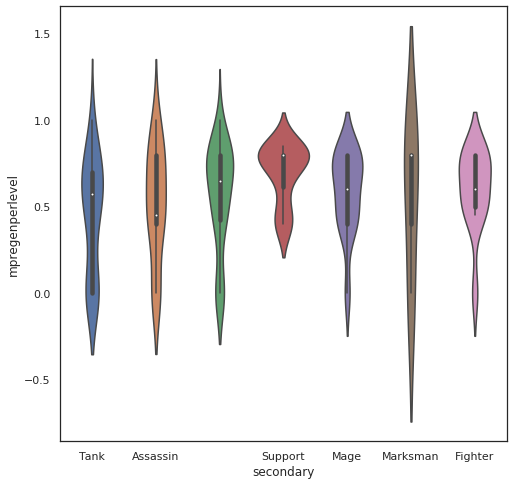

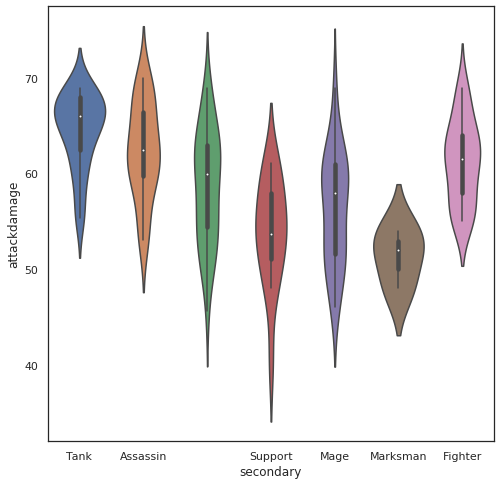

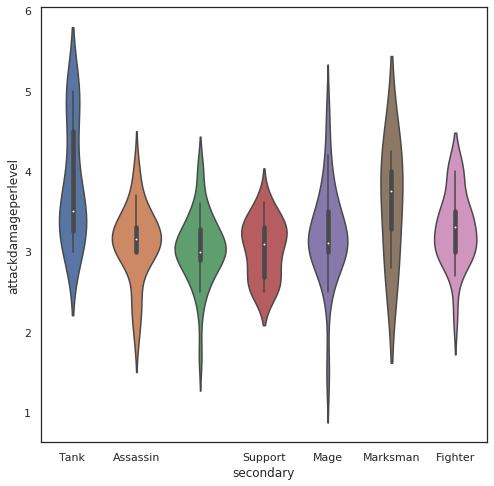

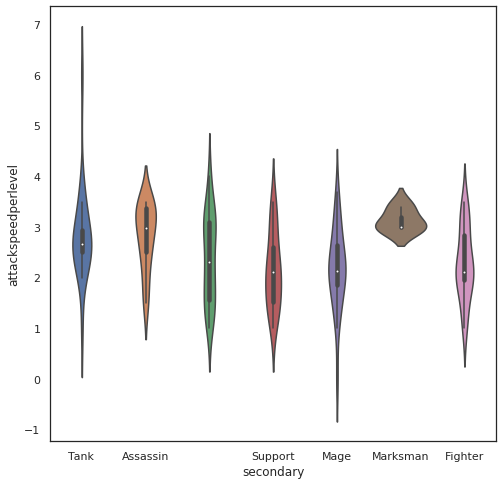

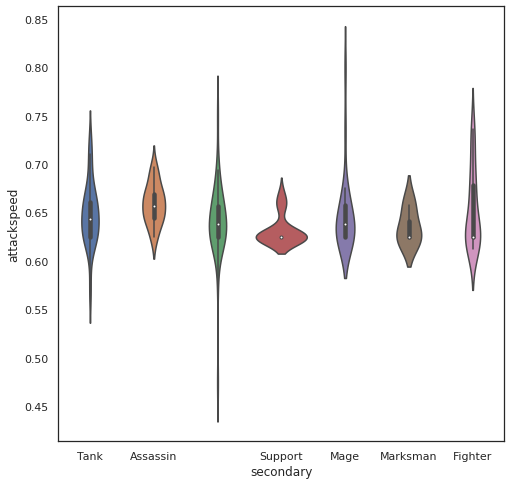

In [10]:
for column in columns[3:]:
    plt.figure(figsize=(8, 8))
    sns.violinplot(x='secondary', y=column, data=df)

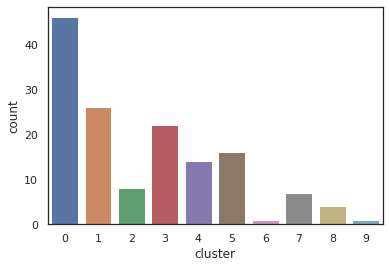

In [35]:
from sklearn import cluster

stats_dataset = df.drop(columns=['id', 'primary', 'secondary'])

cluster = sklearn.cluster.KMeans(n_clusters=10)
cluster.fit(stats_dataset.values)

y_kmeans = cluster.predict(stats_dataset)

results = pd.DataFrame([df.id, y_kmeans]).T
results.columns = ['id', 'cluster']
sns.countplot(x='cluster', data=results)

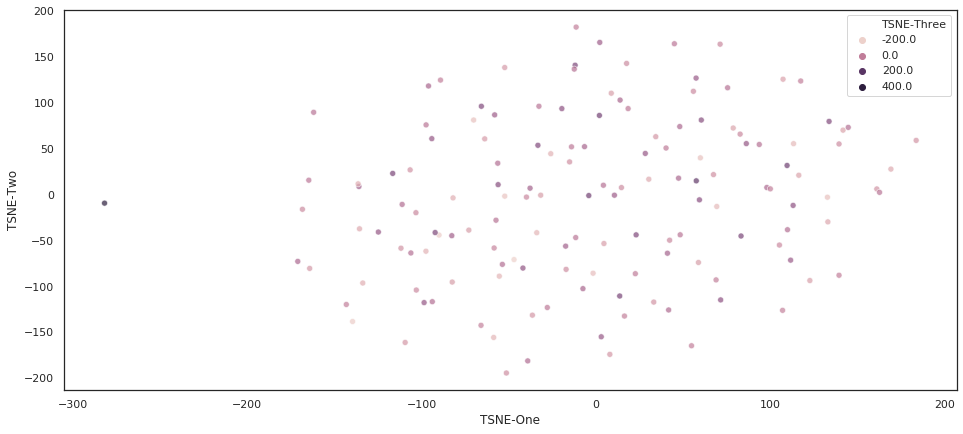

In [73]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3)
results = pd.DataFrame.from_records(tsne.fit_transform(stats_dataset))
results.columns = ['TSNE-One', 'TSNE-Two', 'TSNE-Three']

plt.figure(figsize=(16,7))
sns.scatterplot(
    x='TSNE-One', 
    y='TSNE-Two',
    hue='TSNE-Three',
    data=results,
    alpha=0.7
)